# Obtain Forecasts Using Exponential Smoothing

***

### Importing Modules and Loading in Data

In [1]:
# load modules
import statsmodels.tsa.holtwinters as sm
import statsmodels.tools.eval_measures as em
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import weekly finance series, skipping column names
ts = np.genfromtxt("../Data/Train/Clean/weekly_finance_clean.csv", delimiter = ',', skip_header = 1)

In [3]:
ts.shape

(164, 247)

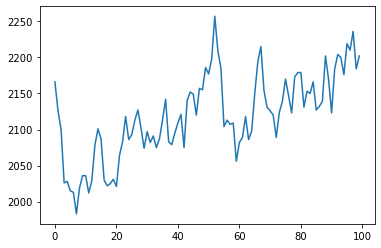

In [4]:
plt.plot(ts[4,:100])

***

## SES

### Experimental Modeling

See the [statsmodels](https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html#statsmodels.tsa.holtwinters.ExponentialSmoothing) documentation for the `ExponentialSmoothing` function.

In [5]:
# exponential smoothing function
# can be used for SES + trend/damped trend + seasonal
ES = sm.ExponentialSmoothing(endog = ts[4,:100], # time series to model
                             initialization_method = 'estimated') # method to initialize the recursions

In [6]:
ses = ES.fit()

In [7]:
ses.summary()

Dep. Variable:,endog,No. Observations:,100
Model:,ExponentialSmoothing,SSE,97989.631
Optimized:,True,AIC,692.745
Trend:,None,BIC,697.955
Seasonal:,None,AICC,693.166
Seasonal Periods:,None,Date:,"Tue, 08 Feb 2022"
Box-Cox:,False,Time:,14:52:21
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9074864,alpha,True
initial_level,2162.0184,l.0,True


The fitted object has parameters $[\alpha, \beta, \gamma, \text{initial_level}, \text{initial_trend}, \phi]$.

In [8]:
ses.optimized

array([ True, False, False,  True, False, False])

***

### Generalized Modeling - One Series

Construct a loop that trains a simple exponential smoothing model on `nt` time periods, then generates `nfs` rolling one-step-ahead forecasts.

In [9]:
# loop performing rolling one-step-ahead forecasts

# number of initial training observations
nt = 100
# number of forecasts to perform
nfs = 100
# empty array to store forecasted values
pred_vals = np.array([])

for i in range(nfs):
    # specify model
    ES = sm.ExponentialSmoothing(endog = ts[4, :(nt+i)],
                                 initialization_method = 'estimated')
    # fit model
    ses = ES.fit()
    # extract one-step-ahead forecast
    pred_vals = np.append(pred_vals, ses.fittedfcast[-1])

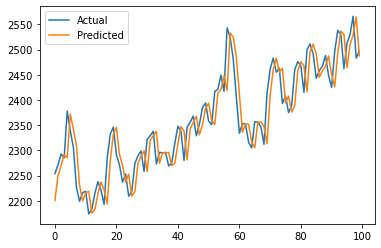

In [10]:
plt.plot(ts[4, nt:(nt+nfs)], label = "Actual")
plt.plot(pred_vals, label = "Predicted")
plt.legend()

***

### Generalized Modeling - All Series

In [11]:
# number of initial training observations
nt = 200
# number of forecasts to perform
nfs = 47
# empty array to store forecasted values
pred_vals = np.zeros([ts.shape[0], nfs])

# loop through all series
for i in range(ts.shape[0]):
    if i % 10 == 0:
        print(i)
    # loop for nfs one-step-ahead forecasts
    for j in range(nfs):
        #specify model
        ES = sm.ExponentialSmoothing(endog = ts[i, :(nt+j)],
                                     initialization_method = 'estimated')
        
        # fit model
        ses = ES.fit()
        # extract one-step-ahead forecast
        pred_vals[i,j] = ses.fittedfcast[-1]

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160


In [12]:
# array of forecasts for each series
pred_vals

array([[10647.95671217, 10667.24308356, 10659.33268771, ...,
        10642.24615641, 10678.82898703, 10678.00368315],
       [ 3587.4       ,  3711.49999815,  3711.5       , ...,
         3534.2       ,  3566.89999946,  3566.9       ],
       [  961.62017289,   975.58522221,   987.38963895, ...,
         1049.58249914,  1071.51873696,  1052.7357924 ],
       ...,
       [ 2450.2167574 ,  2341.46295713,  2479.64595469, ...,
         2519.81121194,  2407.33835725,  2386.42689151],
       [ 1731.61567816,  1820.00484785,  1932.31715886, ...,
         2108.12395478,  2103.8374189 ,  2157.10229505],
       [ 6574.02973158,  6366.7040184 ,  6282.68162553, ...,
         6017.09463751,  6118.16286118,  6032.5070758 ]])

In [13]:
# actual values
actual_vals = ts[:, nt:(nt+nfs)]
actual_vals

array([[10667.34, 10659.32, 10662.86, ..., 10678.92, 10678.  , 10676.48],
       [ 3711.5 ,  3711.5 ,  3626.3 , ...,  3566.9 ,  3566.9 ,  3489.8 ],
       [ 1007.1 ,  1013.3 ,   914.4 , ...,  1113.3 ,  1016.8 ,  1084.1 ],
       ...,
       [ 2329.  ,  2498.5 ,  2385.1 , ...,  2378.3 ,  2381.2 ,  2509.4 ],
       [ 1863.9 ,  1985.  ,  1937.  , ...,  2102.2 ,  2177.5 ,  2160.3 ],
       [ 6307.  ,  6259.  ,  6003.  , ...,  6140.  ,  6014.  ,  5811.  ]])

In [14]:
# calculate root mean squared error and mean absolute error

# empty arrays for errors
rmse = np.zeros(ts.shape[0])
mae = np.zeros(ts.shape[0])

for i in range(ts.shape[0]):
    rmse[i] = em.rmse(actual_vals[i,:], pred_vals[i,:])
    mae[i] = em.meanabs(actual_vals[i,:], pred_vals[i,:])

In [15]:
# average root mean squared error
np.mean(rmse)

70.1273144007386

In [16]:
# average mean absolute error
np.mean(mae)

51.20776300962823

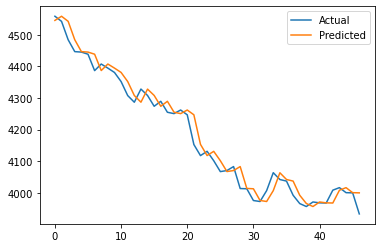

In [17]:
plt.plot(ts[10, nt:(nt+nfs)], label = "Actual")
plt.plot(pred_vals[10,:], label = "Predicted")
plt.legend()

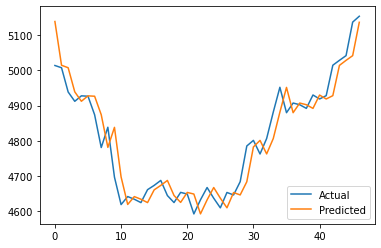

In [18]:
plt.plot(ts[50, nt:(nt+nfs)], label = "Actual")
plt.plot(pred_vals[50,:], label = "Predicted")
plt.legend()

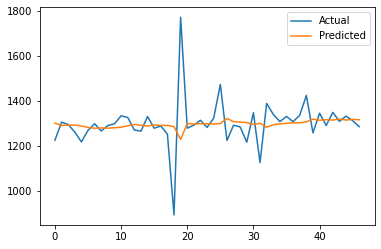

In [19]:
plt.plot(ts[150, nt:(nt+nfs)], label = "Actual")
plt.plot(pred_vals[150,:], label = "Predicted")
plt.legend()

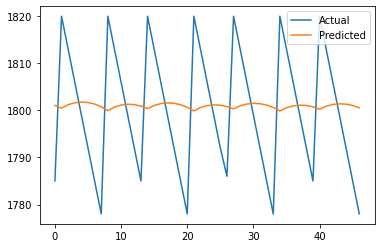

In [20]:
plt.plot(ts[160, nt:(nt+nfs)], label = "Actual")
plt.plot(pred_vals[160,:], label = "Predicted")
plt.legend()

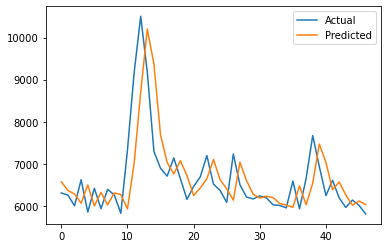

In [21]:
plt.plot(ts[163, nt:(nt+nfs)], label = "Actual")
plt.plot(pred_vals[163,:], label = "Predicted")
plt.legend()

***

## DES - Holt's Linear Trend Method

### Experimental Modeling - One Series

In [22]:
# exponential smoothing function
# can be used for SES + trend/damped trend + seasonal
ES = sm.ExponentialSmoothing(endog = ts[4,:100], # time series to model
                             initialization_method = 'estimated', # method to initialize the recursions
                             trend = 'additive') # include additive trend

In [23]:
des = ES.fit()

In [24]:
des.summary()

Dep. Variable:,endog,No. Observations:,100
Model:,ExponentialSmoothing,SSE,97971.162
Optimized:,True,AIC,696.726
Trend:,Additive,BIC,707.147
Seasonal:,None,AICC,697.629
Seasonal Periods:,None,Date:,"Tue, 08 Feb 2022"
Box-Cox:,False,Time:,14:52:54
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9069197,alpha,True
smoothing_trend,3.1818e-14,beta,True


In [25]:
des.optimized

array([ True,  True, False,  True,  True, False])

***

### Generalized Modeling - One Series

In [26]:
# loop performing rolling one-step-ahead forecasts

# number of initial training observations
nt = 100
# number of forecasts to perform
nfs = 100
# empty array to store forecasted values
pred_vals = np.array([])

for i in range(nfs):
    # specify model
    ES = sm.ExponentialSmoothing(endog = ts[4, :(nt+i)],
                                 initialization_method = 'estimated',
                                 trend = 'additive')
    # fit model
    des = ES.fit()
    # extract one-step-ahead forecast
    pred_vals = np.append(pred_vals, des.fittedfcast[-1])

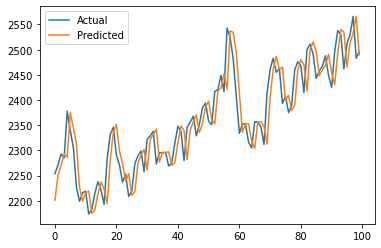

In [27]:
plt.plot(ts[4, nt:(nt+nfs)], label = "Actual")
plt.plot(pred_vals, label = "Predicted")
plt.legend()

***

### Sidebar - `'Optimization Failed to Converge'`

 We observe some instances where the model reports that the optimization failed to converge. However, I investigated this further and the model still reports `True` values for whether the parameters have been optimized, and the model generates reasonable forecasts.

See this example:

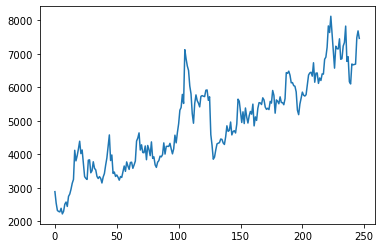

In [28]:
plt.plot(ts[85,:])

The model for $i = 1, \dots, 245$ used to predict $i = 246$ is reported as `failed to converge`. The forecast generated from the model still appears reasonable.

In [29]:
ES = sm.ExponentialSmoothing(endog = ts[85, :(nt+46)],
                             initialization_method = 'estimated',
                             trend = 'additive')
        
# fit model
des = ES.fit()

print(des.forecast(1))
print(ts[85, nt+46])

[4716.92235268]
4635.76


We check the values returned from the optimization function and see `'Inequality contraints incompatible'`. We did not specify any constraints ourselves, so these must be the default ones. This issue may be resolved by pre-processing the data, which is a process I am not familiar with for forecasting (need to revisit this).

In [30]:
des.mle_retvals

     fun: 13256151.343959028
     jac: array([ 4.11812750e+05,  1.15275249e+07, -6.03500000e+02,  3.43750000e+01])
 message: 'Optimization terminated successfully'
    nfev: 39
     nit: 8
    njev: 4
  status: 0
 success: True
       x: array([9.24569101e-01, 3.56017435e-03, 2.53840414e+03, 1.51515915e+01])

Interestingly, the attribute indicating whether each parameter was optimized reports all parameters as optimal.

In [31]:
des.optimized

array([ True,  True, False,  True,  True, False])

The model summary reports all optimal parameters as well.

In [32]:
des.summary()

Dep. Variable:,endog,No. Observations:,146
Model:,ExponentialSmoothing,SSE,13256151.344
Optimized:,True,AIC,1674.789
Trend:,Additive,BIC,1686.724
Seasonal:,None,AICC,1675.394
Seasonal Periods:,None,Date:,"Tue, 08 Feb 2022"
Box-Cox:,False,Time:,14:52:57
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9245691,alpha,True
smoothing_trend,0.0035602,beta,True


Let's look at the full forecasting process for this series.

In [33]:
pred_vals = np.zeros([nfs])
for j in range(nfs):
    ES = sm.ExponentialSmoothing(endog = ts[85, :(nt+j)],
                                 initialization_method = 'estimated',
                                 trend = 'additive')
    # fit model
    des = ES.fit()
    # extract one-step-ahead forecast
    pred_vals[j] = des.fittedfcast[-1]

C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


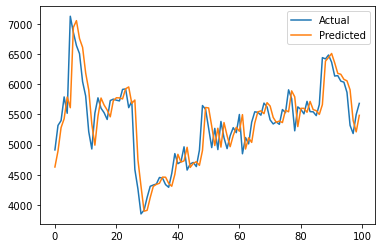

In [34]:
plt.plot(ts[85, nt:(nt+nfs)], label = "Actual")
plt.plot(pred_vals, label = "Predicted")
plt.legend()

We'll ignore this issue for now, and see if it still pops up after more thorough data pre-processing.

**Follow Up**: The boxcox transformation appears to resolve the optimization issue when it is present. However, applying this transformation automatically to all data creates the optimization issue for series that did not previously have problems. Need to see about conditionally applying the transformation.

***

### Generalized Modeling - All Series

In [35]:
# number of initial training observations
nt = 200
# number of forecasts to perform
nfs = 47
# empty array to store forecasted values
pred_vals = np.zeros([ts.shape[0], nfs])

# loop through all series
for i in range(ts.shape[0]):
    if i % 10 == 0:
        print(i, 'out of', ts.shape[0], 'series complete.')
    # loop for nfs one-step-ahead forecasts
    for j in range(nfs):
        #specify model
        ES = sm.ExponentialSmoothing(endog = ts[i, :(nt+j)],
                                     initialization_method = 'estimated',
                                     trend = 'additive')
        
        # fit model
        des = ES.fit()
        # extract one-step-ahead forecast
        pred_vals[i,j] = des.fittedfcast[-1]

0 out of 164 series complete.
10 out of 164 series complete.
20 out of 164 series complete.
30 out of 164 series complete.
40 out of 164 series complete.
50 out of 164 series complete.
60 out of 164 series complete.
70 out of 164 series complete.
80 out of 164 series complete.


C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roami

90 out of 164 series complete.
100 out of 164 series complete.


C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


110 out of 164 series complete.


C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


120 out of 164 series complete.
130 out of 164 series complete.
140 out of 164 series complete.


C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roami

150 out of 164 series complete.


C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roami

160 out of 164 series complete.


C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roami

C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [36]:
# calculate root mean squared error and mean absolute error

# empty arrays for errors
rmse = np.zeros(ts.shape[0])
mae = np.zeros(ts.shape[0])

for i in range(ts.shape[0]):
    rmse[i] = em.rmse(actual_vals[i,:], pred_vals[i,:])
    mae[i] = em.meanabs(actual_vals[i,:], pred_vals[i,:])

# average root mean squared error
print(np.mean(rmse))

# average mean absolute error
print(np.mean(mae))

70.76656017632934
51.83972774540925


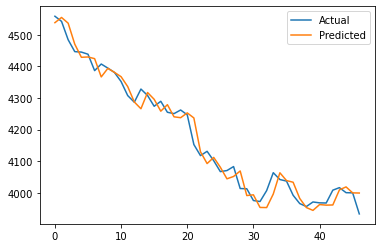

In [37]:
plt.plot(ts[10, nt:(nt+nfs)], label = "Actual")
plt.plot(pred_vals[10,:], label = "Predicted")
plt.legend()

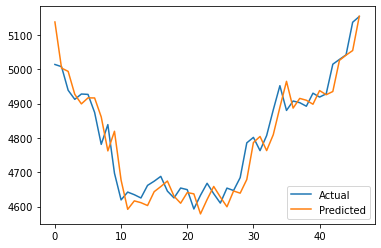

In [38]:
plt.plot(ts[50, nt:(nt+nfs)], label = "Actual")
plt.plot(pred_vals[50,:], label = "Predicted")
plt.legend()

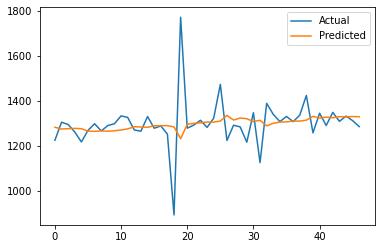

In [39]:
plt.plot(ts[150, nt:(nt+nfs)], label = "Actual")
plt.plot(pred_vals[150,:], label = "Predicted")
plt.legend()

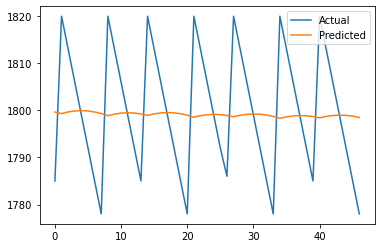

In [40]:
plt.plot(ts[160, nt:(nt+nfs)], label = "Actual")
plt.plot(pred_vals[160,:], label = "Predicted")
plt.legend()

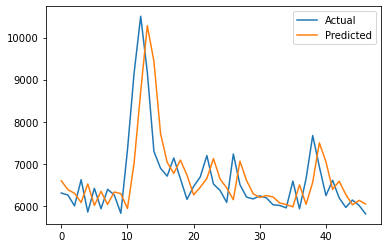

In [41]:
plt.plot(ts[163, nt:(nt+nfs)], label = "Actual")
plt.plot(pred_vals[163,:], label = "Predicted")
plt.legend()

***

## DES' - Holt's Linear Trend Method (with Damping)

We'll go ahead and jump to the generalized modeling for one series.

### Generalized Modeling - One Series

In [42]:
# loop performing rolling one-step-ahead forecasts

# number of initial training observations
nt = 100
# number of forecasts to perform
nfs = 100
# empty array to store forecasted values
pred_vals = np.array([])

for i in range(nfs):
    # specify model
    ES = sm.ExponentialSmoothing(endog = ts[4, :(nt+i)],
                                 initialization_method = 'estimated',
                                 trend = 'additive',
                                 damped_trend = True)
    # fit model
    desd = ES.fit()
    # extract one-step-ahead forecast
    pred_vals = np.append(pred_vals, desd.fittedfcast[-1])

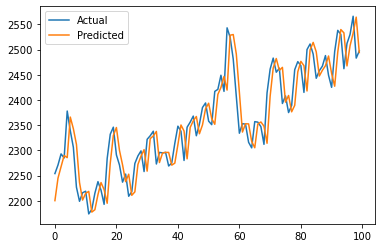

In [43]:
plt.plot(ts[4, nt:(nt+nfs)], label = "Actual")
plt.plot(pred_vals, label = "Predicted")
plt.legend()

***

### Generalized Modeling - All Series

In [44]:
# number of initial training observations
nt = 200
# number of forecasts to perform
nfs = 47
# empty array to store forecasted values
pred_vals = np.zeros([ts.shape[0], nfs])

# loop through all series
for i in range(ts.shape[0]):
    if i % 10 == 0:
        print(i, 'out of', ts.shape[0], 'series complete.')
    # loop for nfs one-step-ahead forecasts
    for j in range(nfs):
        #specify model
        ES = sm.ExponentialSmoothing(endog = ts[i, :(nt+j)],
                                     initialization_method = 'estimated',
                                     trend = 'additive',
                                     damped_trend = True)
        
        # fit model
        desd = ES.fit()
        # extract one-step-ahead forecast
        pred_vals[i,j] = desd.fittedfcast[-1]

0 out of 164 series complete.
10 out of 164 series complete.
20 out of 164 series complete.
30 out of 164 series complete.
40 out of 164 series complete.
50 out of 164 series complete.
60 out of 164 series complete.
70 out of 164 series complete.
80 out of 164 series complete.
90 out of 164 series complete.
100 out of 164 series complete.


C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


110 out of 164 series complete.
120 out of 164 series complete.
130 out of 164 series complete.


C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


140 out of 164 series complete.


C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roami

150 out of 164 series complete.


C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roami

160 out of 164 series complete.


C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roami

In [45]:
# calculate root mean squared error and mean absolute error

# empty arrays for errors
rmse = np.zeros(ts.shape[0])
mae = np.zeros(ts.shape[0])

for i in range(ts.shape[0]):
    rmse[i] = em.rmse(actual_vals[i,:], pred_vals[i,:])
    mae[i] = em.meanabs(actual_vals[i,:], pred_vals[i,:])

# average root mean squared error
print(np.mean(rmse))

# average mean absolute error
print(np.mean(mae))

70.30037307509511
51.33216569228959


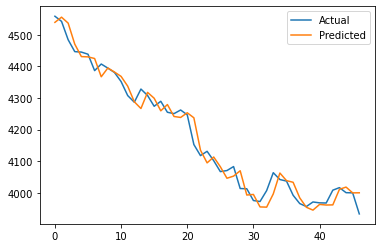

In [46]:
plt.plot(ts[10, nt:(nt+nfs)], label = "Actual")
plt.plot(pred_vals[10,:], label = "Predicted")
plt.legend()

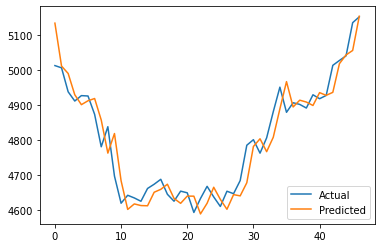

In [47]:
plt.plot(ts[50, nt:(nt+nfs)], label = "Actual")
plt.plot(pred_vals[50,:], label = "Predicted")
plt.legend()

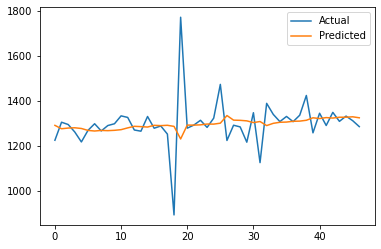

In [48]:
plt.plot(ts[150, nt:(nt+nfs)], label = "Actual")
plt.plot(pred_vals[150,:], label = "Predicted")
plt.legend()

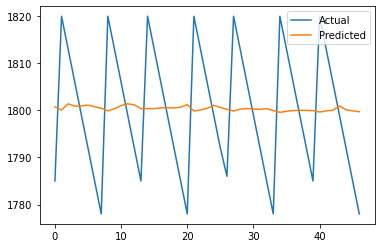

In [49]:
plt.plot(ts[160, nt:(nt+nfs)], label = "Actual")
plt.plot(pred_vals[160,:], label = "Predicted")
plt.legend()

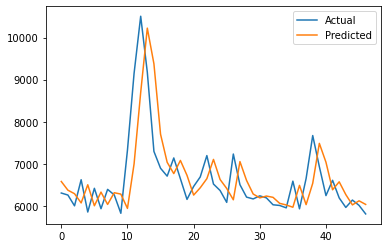

In [50]:
plt.plot(ts[163, nt:(nt+nfs)], label = "Actual")
plt.plot(pred_vals[163,:], label = "Predicted")
plt.legend()

***

## TES' - Holt-Winters' Seasonal Method

Finally, we'll try incorporating a seasonal component. This is weekly data, so we'll experiment with some different values of $m = 1, 4, 52$. Let's jump straight into modeling on all series.

In [51]:
# number of initial training observations
nt = 200
# number of forecasts to perform
nfs = 47
# empty array to store forecasted values
pred_vals = np.zeros([ts.shape[0], nfs])

# loop through all series
for i in range(ts.shape[0]):
    if i % 10 == 0:
        print(i, 'out of', ts.shape[0], 'series complete.')
    # loop for nfs one-step-ahead forecasts
    for j in range(nfs):
        #specify model
        ES = sm.ExponentialSmoothing(endog = ts[i, :(nt+j)],
                                     initialization_method = 'estimated',
                                     trend = 'additive',
                                     damped_trend = True,
                                     seasonal = 'additive',
                                     seasonal_periods = 4)
        
        # fit model
        desds = ES.fit()
        # extract one-step-ahead forecast
        pred_vals[i,j] = desds.fittedfcast[-1]

0 out of 164 series complete.
10 out of 164 series complete.
20 out of 164 series complete.
30 out of 164 series complete.
40 out of 164 series complete.
50 out of 164 series complete.
60 out of 164 series complete.
70 out of 164 series complete.
80 out of 164 series complete.
90 out of 164 series complete.
100 out of 164 series complete.


C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


110 out of 164 series complete.


C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roami

120 out of 164 series complete.
130 out of 164 series complete.
140 out of 164 series complete.


C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roami

C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


150 out of 164 series complete.


C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roami

C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roami

C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roami

160 out of 164 series complete.


C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Cameron\AppData\Roami

In [52]:
# calculate root mean squared error and mean absolute error

# empty arrays for errors
rmse = np.zeros(ts.shape[0])
mae = np.zeros(ts.shape[0])

for i in range(ts.shape[0]):
    rmse[i] = em.rmse(actual_vals[i,:], pred_vals[i,:])
    mae[i] = em.meanabs(actual_vals[i,:], pred_vals[i,:])

# average root mean squared error
print(np.mean(rmse))

# average mean absolute error
print(np.mean(mae))

72.05941358421552
53.342824195082976


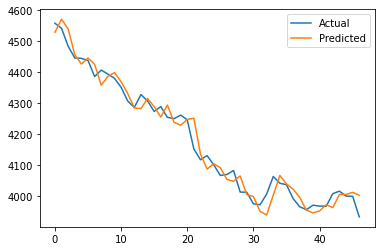

In [53]:
plt.plot(ts[10, nt:(nt+nfs)], label = "Actual")
plt.plot(pred_vals[10,:], label = "Predicted")
plt.legend()

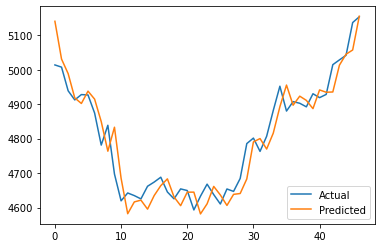

In [54]:
plt.plot(ts[50, nt:(nt+nfs)], label = "Actual")
plt.plot(pred_vals[50,:], label = "Predicted")
plt.legend()

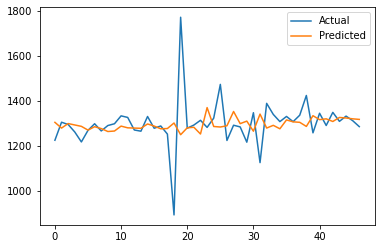

In [55]:
plt.plot(ts[150, nt:(nt+nfs)], label = "Actual")
plt.plot(pred_vals[150,:], label = "Predicted")
plt.legend()

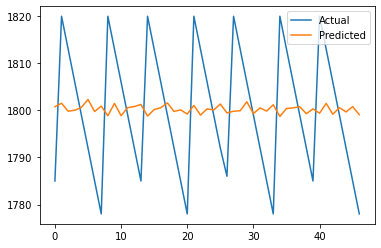

In [56]:
plt.plot(ts[160, nt:(nt+nfs)], label = "Actual")
plt.plot(pred_vals[160,:], label = "Predicted")
plt.legend()

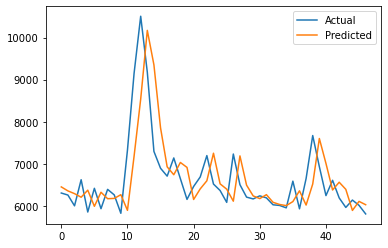

In [57]:
plt.plot(ts[163, nt:(nt+nfs)], label = "Actual")
plt.plot(pred_vals[163,:], label = "Predicted")
plt.legend()